# Classification Analysis of Earnings Estimates

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

%matplotlib inline

In [20]:
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 25)
pd.set_option('precision', 3)

In [21]:
with open('/Users/samfunk/ds/metis/project_mcnulty/code/master_df.pkl', 'rb') as f:
    master = pickle.load(f)   

# Classifiers

In [13]:
shuffle = master.sample(frac=1)

features = shuffle.loc[:, ['bookvalue', 'fcf', 'cash', 'dividends', 'interest_coverage', 'current_ratio', 'debt_to_equity', 'income_quality', 'r_and_d']]
target = shuffle.buckets
X = np.array(features)
y = np.array(target)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
ss.fit(X_train)
X_train_std = ss.transform(X_train)
X_test_std = ss.fit_transform(X_test)

## Logistic Regression

In [14]:
lr = LogisticRegression()
lr.fit(X_train_std, Y_train)
y_pred = lr.predict(X_test_std)
print(accuracy_score(Y_test, y_pred))

0.552577319588


## Naive Bayes

In [15]:
gnb = GaussianNB()
gnb.fit(X_train_std, Y_train)
y_pred = gnb.predict(X_test_std)
print(accuracy_score(Y_test, y_pred))

0.534020618557


## SVM

In [16]:
svc = SVC()
svc.fit(X_train_std, Y_train)
y_pred = svc.predict(X_test_std)
print(accuracy_score(Y_test, y_pred))

0.579381443299


## Decision Tree

In [17]:
dt = DecisionTreeClassifier()
dt.fit(X_train_std, Y_train)
y_pred = dt.predict(X_test_std)
print(accuracy_score(Y_test, y_pred))

0.519587628866


## Random Forest

In [18]:
X_std = ss.fit_transform(X)

rf = RandomForestClassifier()
rf.fit(X_std, y)
y_pred = rf.predict(X_std)
print(accuracy_score(y, y_pred))

0.986082474227


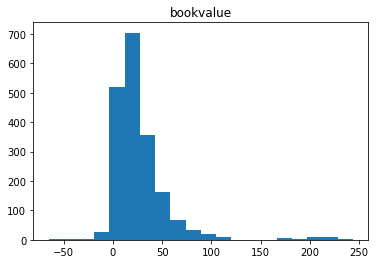

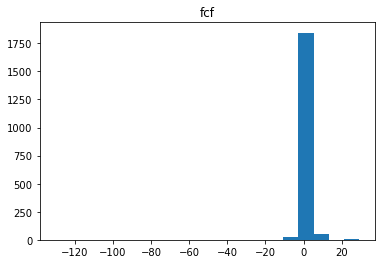

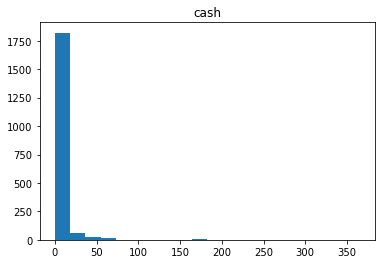

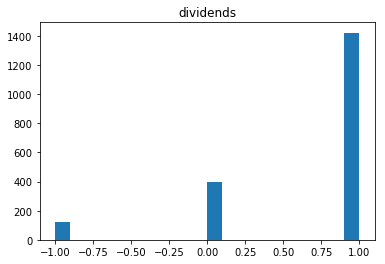

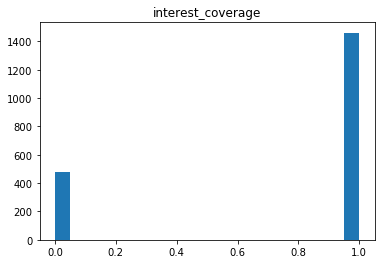

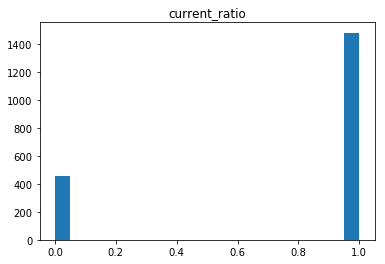

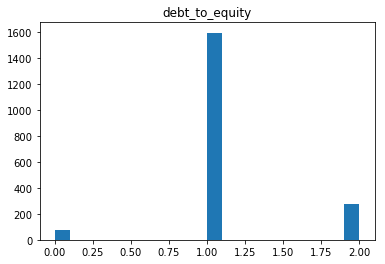

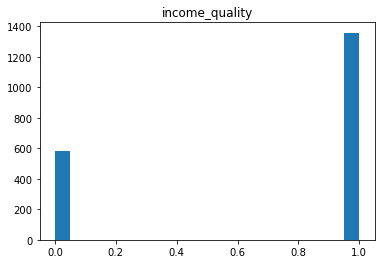

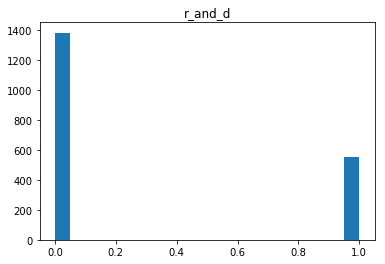

In [42]:
for col in range(len(features.columns)):
    name = features.columns[col]
    plt.hist(features[name], bins=20)
    plt.title(name)
    plt.show();

In [23]:
master

,ticker_quarter,date,bookvalue,fcf,intdebt,cash,debt_equity,interest,currentR,incomeQ,payout,intangible,rd,difference,surprise,binary,abs_surprise,abslog_surprise,buckets,dividends,interest_coverage,current_ratio,debt_to_equity,income_quality,r_and_d
0,AAPL_1,2017-07-01,25.490,1.171,20.854,3.575,0.818,0.000,1.388,0.959,0.375,0.024,0.065,-0.16,-9.6,-1.0,9.6,2.262,1.0,1,0,1,1,0,1
1,AAPL_2,2017-04-01,25.658,1.827,18.853,2.900,0.735,0.000,1.391,1.135,0.270,0.024,0.052,0.15,4.7,1.0,4.7,1.548,0.0,1,0,1,1,1,1
2,AAPL_3,2016-12-31,24.986,4.477,16.523,3.090,0.661,0.000,1.228,1.512,0.169,0.025,0.037,0.08,4.0,1.0,4.0,1.386,0.0,1,0,1,1,1,1
3,AAPL_4,2016-09-24,23.896,2.264,16.216,3.817,0.679,0.000,1.353,1.789,0.337,0.027,0.055,0.10,6.4,1.0,6.4,1.856,1.0,1,0,1,1,1,1
4,MSFT_1,2017-06-30,9.382,1.130,11.171,17.234,1.191,0.000,2.477,1.690,0.459,0.188,0.151,0.04,5.9,1.0,5.9,1.775,0.0,1,0,1,1,1,1
5,MSFT_2,2017-03-31,9.026,1.161,10.875,16.313,1.205,0.000,2.813,2.220,0.629,0.201,0.152,0.01,1.3,1.0,1.3,0.262,0.0,1,0,1,1,1,1
6,MSFT_3,2016-12-31,8.873,0.555,10.957,15.832,1.235,0.000,2.048,1.210,0.582,0.203,0.127,0.00,0.0,0.0,0.0,-inf,0.0,1,0,1,1,1,1
7,MSFT_4,2016-09-30,9.035,1.205,9.589,17.580,1.061,0.000,2.685,2.462,0.600,0.101,0.152,0.35,49.3,1.0,49.3,3.898,1.0,1,0,1,1,1,1
8,FB_1,2017-06-30,22.924,1.350,0.000,2.156,0.000,0.000,12.309,1.378,0.000,0.275,0.206,0.12,12.4,1.0,12.4,2.518,1.0,0,0,1,1,1,1
9,FB_2,2017-03-31,21.511,1.310,0.000,2.457,0.000,0.000,12.613,1.653,0.000,0.298,0.228,0.10,7.6,1.0,7.6,2.028,1.0,0,0,1,1,1,1
